# Assignment 3: CIFAR10 Image Classification
## COMP-3704 (241552) Neural Networks and Deep Learning

### Brandon, Santiago

# 1 Data

In [1]:
# Importing libraries
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

from pprint import pprint

from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras import applications
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split as tts
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Objective
The objective of this project to classify images in the CIFAR10 dataset using a convolutional neural network of out making

### Data

The data CIFAR10 is a subset of the 80 million tiny images dataset. They were collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.

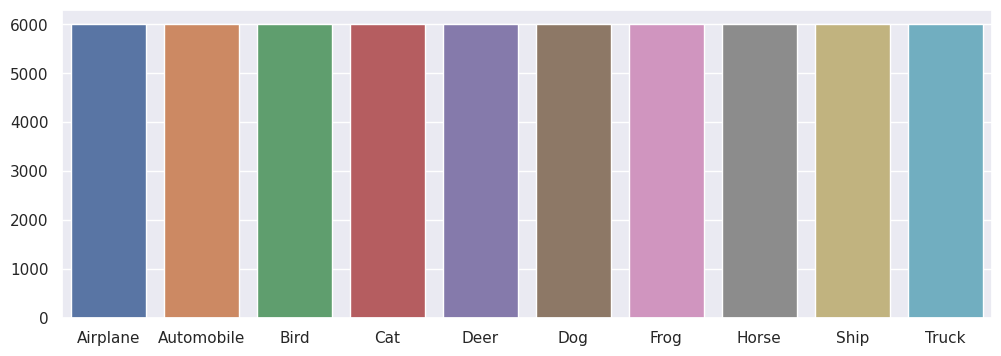

In [2]:
# 1A
# Importing data into train and test features and labels
(x_train, y_train),(x_test, y_test) =\
 tf.keras.datasets.cifar10.load_data()


# Converting into numpy array
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test  = np.array(x_test)
y_test  = np.array(y_test)

# Creating batch size and img dimensions
batch_size = 100
img_height = 32
img_width = 32

# Stacking train and test labels and features
# To display on barplot
Y_full = np.vstack((y_train,y_test))

# Reshaping labels into 1D arrays
y_train = y_train.reshape((-1))
y_test = y_test.reshape((-1))

# Printing out Element count
y_counts = np.unique(Y_full, return_counts=True)
sns.set(rc={'figure.figsize':(12,4)})
sns.barplot(x=y_counts[0], y=y_counts[1])
classes = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
plt.xticks([0,1,2,3,4,5,6,7,8,9], classes)
plt.show()

### Classes

There are a total of 10 classes with 6000 images in each class

Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck

### Barplot

The dataset appears to be very well balanced with every class having 6000 images pertaining to it

In [3]:
# 1C Train test split
x_test, x_val, y_test, y_val = tts(x_test, y_test, test_size = 0.5
                                                 , random_state=42)

In [4]:
# 1D Training data img generator
train_img_gen = ImageDataGenerator(rescale=1./255, width_shift_range=0.1,
                                   height_shift_range=0.1, horizontal_flip=True,
                                   vertical_flip=True)

# 1D Testing data img generator
test_img_gen = ImageDataGenerator(rescale=1./255)

# 1D Testing data img generator
val_img_gen = ImageDataGenerator(rescale=1./255)

In [5]:
# 1D generating data
train_img_gen_1 = train_img_gen.flow(x_train, y_train
                                     , batch_size=batch_size, shuffle =False)

test_img_gen_1 = test_img_gen.flow(x_test, y_test
                                   , batch_size=batch_size, shuffle =False)

val_img_gen_1 = val_img_gen.flow(x_val, y_val
                                 , batch_size=batch_size, shuffle =False)

# 2 Modeling

In [6]:
# Creating sequential model
model_1 = Sequential([
    # Convolution layer
    layers.Conv2D(32, 3, activation='relu'
                  , input_shape=(img_height, img_width, 3)),
    # Pooling layer
    layers.MaxPooling2D(),

    # Convolution layer
    layers.Conv2D(256, 3, activation = 'relu'),

    # Convolution layer
    layers.Conv2D(512, 3, activation = 'relu'),
    layers.Dropout(.2),

    # Convolution layer
    layers.Conv2D(1024, 3, activation = 'relu'),

    # Pooling layer
    layers.MaxPooling2D(),

    # Convolution layer
    layers.Conv2D(512, 3, activation = 'relu'),

    # Pooling layer
    layers.MaxPooling2D(),

    # Flatten layer
    layers.Flatten(),
    # Dense layer
    layers.Dense(1024, activation ='relu'),
    layers.Dropout(.2),
    layers.Dense(256, activation ='relu'),
    layers.Dense(128, activation ='relu'),

    # Top layer for output
    layers.Dense(10, activation='softmax')])

In [7]:
# Optimzer for compiler
# Selected Adam as it produced the best results
# Other optimizers we tested were AdamW, Adagrad, and Lion
optimizer = tf.keras.optimizers.Adam(0.001)

# Loss function for compiler
loss = tf.keras.losses.SparseCategoricalCrossentropy()

# Compiling model
model_1.compile(loss=loss,optimizer=optimizer
                , metrics=['accuracy'])

# Printing out model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 256)       73984     
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 512)       1180160   
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 1024)        4719616   
                                                                 
 dropout (Dropout)           (None, 9, 9, 1024)        0         
                                                        

In [8]:
# Fitting model
model_1.fit(train_img_gen_1,
            epochs=20,
            validation_data=test_img_gen_1,)

model_1.save('classification_model.keras')

Epoch 1/20
500/500 [==============================] - 55s 84ms/step - loss: 1.8632 - accuracy: 0.2834 - val_loss: 1.6750 - val_accuracy: 0.3820
Epoch 2/20
500/500 [==============================] - 42s 85ms/step - loss: 1.4933 - accuracy: 0.4479 - val_loss: 1.3467 - val_accuracy: 0.5078
Epoch 3/20
500/500 [==============================] - 48s 96ms/step - loss: 1.3350 - accuracy: 0.5148 - val_loss: 1.2641 - val_accuracy: 0.5512
Epoch 4/20
500/500 [==============================] - 49s 98ms/step - loss: 1.2110 - accuracy: 0.5659 - val_loss: 1.2433 - val_accuracy: 0.5608
Epoch 5/20
500/500 [==============================] - 43s 86ms/step - loss: 1.1213 - accuracy: 0.5975 - val_loss: 1.1114 - val_accuracy: 0.6096
Epoch 6/20
500/500 [==============================] - 45s 89ms/step - loss: 1.0537 - accuracy: 0.6250 - val_loss: 1.0952 - val_accuracy: 0.6318
Epoch 7/20
500/500 [==============================] - 45s 89ms/step - loss: 0.9991 - accuracy: 0.6448 - val_loss: 0.9709 - val_accuracy:

After much testing, we found that these were the best hyperparameters and architecture for this model. More than 10 epochs resulted in the model beggining to underfit the training data

In [9]:
from keras.src.saving.saving_api import save_model
model_1.save('classification_model.keras')
save_model_model = tf.keras.models.load_model('classification_model.keras')

## Importing model

We tried a total of 3 models, NasnetLarge, Resnet101V2, and Xception

Of the three we decided to settle on Resnet101V2, we decided to settle on Resnet101V2 since all we read about this model stated that it would be both easy to run and provide us with great accuracy for image classification

https://medium.com/latinxinai/computer-vision-cats-vs-dogs-w-resnet-v2-101-7e41ee4934d#:~:text=This%20is%20a%20very%20powerful,accuracy%20in%20image%20classification%20tasks

https://keras.io/api/applications/resnet/


In [10]:
# Importing model
from tensorflow.keras.applications import resnet_v2
img_dim = (32, 32, 3)

# Importing resnet101v2 model
base_model = resnet_v2.ResNet101V2(include_top=False
                              , input_shape=img_dim
                              , weights='imagenet')

In [13]:
# Freezing top layer
base_model.trainable=False

# creating new model
new_model = Sequential([base_model])

# Adding layers to new model
new_model.add(layers.Flatten())

new_model.add(layers.Dense(400, activation = 'relu'))

new_model.add(layers.Dense(128, activation = 'relu'))

new_model.add(layers.Dense(10, activation = 'softmax'))


# Optimizer
optimizer = tf.keras.optimizers.Adam(0.001)

# Compiling model
new_model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=optimizer, metrics=['accuracy'])

# Model Summary
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101v2 (Functional)    (None, 1, 1, 2048)        42626560  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_7 (Dense)             (None, 400)               819600    
                                                                 
 dense_8 (Dense)             (None, 128)               51328     
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 43498778 (165.93 MB)
Trainable params: 872218 (3.33 MB)
Non-trainable params: 42626560 (162.61 MB)
_________________________________________________________________


In [14]:
# Fitting imported model with new top layer
new_model.fit(train_img_gen_1, steps_per_epoch=len(x_train)//batch_size,
            epochs=20,
            validation_data=test_img_gen_1,
            validation_steps=len(x_test)//batch_size)

Epoch 1/20
500/500 [==============================] - 48s 83ms/step - loss: 1.9175 - accuracy: 0.3134 - val_loss: 1.7963 - val_accuracy: 0.3558
Epoch 2/20
500/500 [==============================] - 40s 80ms/step - loss: 1.7990 - accuracy: 0.3568 - val_loss: 1.7636 - val_accuracy: 0.3742
Epoch 3/20
500/500 [==============================] - 47s 93ms/step - loss: 1.7620 - accuracy: 0.3719 - val_loss: 1.7543 - val_accuracy: 0.3740
Epoch 4/20
500/500 [==============================] - 50s 101ms/step - loss: 1.7395 - accuracy: 0.3764 - val_loss: 1.7328 - val_accuracy: 0.3848
Epoch 5/20
500/500 [==============================] - 42s 84ms/step - loss: 1.7308 - accuracy: 0.3831 - val_loss: 1.7342 - val_accuracy: 0.3818
Epoch 6/20
500/500 [==============================] - 39s 78ms/step - loss: 1.7112 - accuracy: 0.3901 - val_loss: 1.7171 - val_accuracy: 0.3892
Epoch 7/20
500/500 [==============================] - 40s 80ms/step - loss: 1.6976 - accuracy: 0.3935 - val_loss: 1.6976 - val_accuracy

After changing the layers and number of neurons, creating multiple new layers with dropouts we were unable to get the accuracy the accuracy on both training and testing to be over 50% in under 100 epochs

# Conclusion

50/50 [==============================] - 1s 21ms/step - loss: 0.7702 - accuracy: 0.7336
Loss on Valiadation set: 0.7702322602272034 
Accuracy on Valiadation set: 0.7336000204086304 



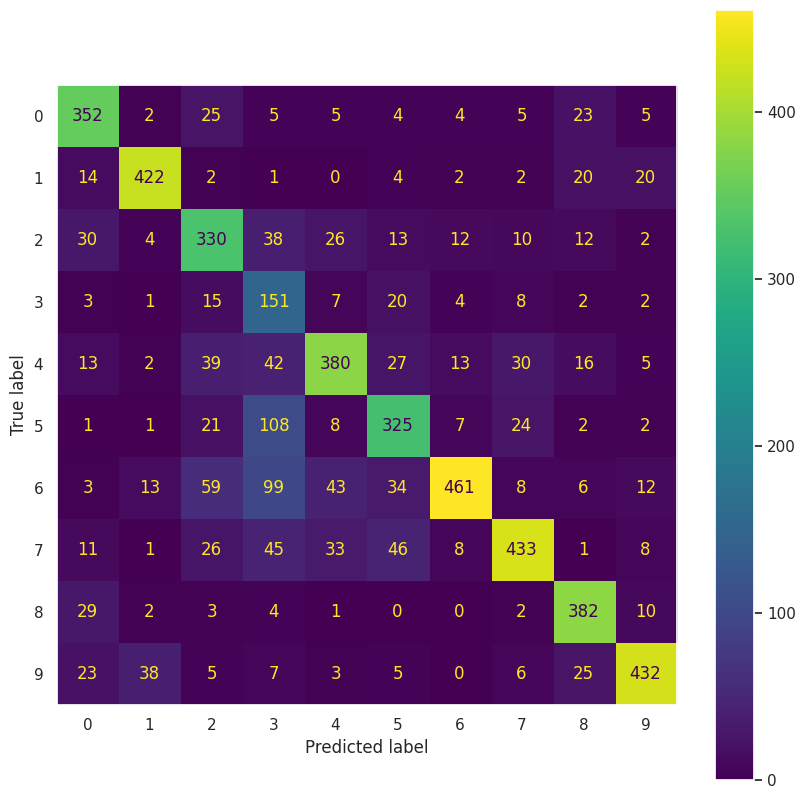

In [15]:
# Seperating loss and accuracy into individual variables
val_loss_m1, val_acc_m1 = model_1.evaluate(val_img_gen_1,
                                               batch_size=batch_size)

# Predicting Valiadation data for confusion matrix
predict_m1 = np.argmax(model_1.predict(val_img_gen_1,
                                       verbose=0), axis=1)

# Creating confusion matrix
cm_m1 = confusion_matrix(predict_m1, y_val)

# Printing loss and accuracy
print('Loss on Valiadation set:', val_loss_m1
      ,'\nAccuracy on Valiadation set:', val_acc_m1, '\n')

sns.set(rc={'figure.figsize':(10,10)})
# Plotting confusion matrix
disp_1 = ConfusionMatrixDisplay(confusion_matrix=cm_m1)
disp_1.plot()
plt.grid(False)
plt.show()

50/50 [==============================] - 1s 27ms/step - loss: 1.6742 - accuracy: 0.4144
Loss on validation set: 1.6742264032363892 
Accuracy on validation set: 0.41440001130104065 



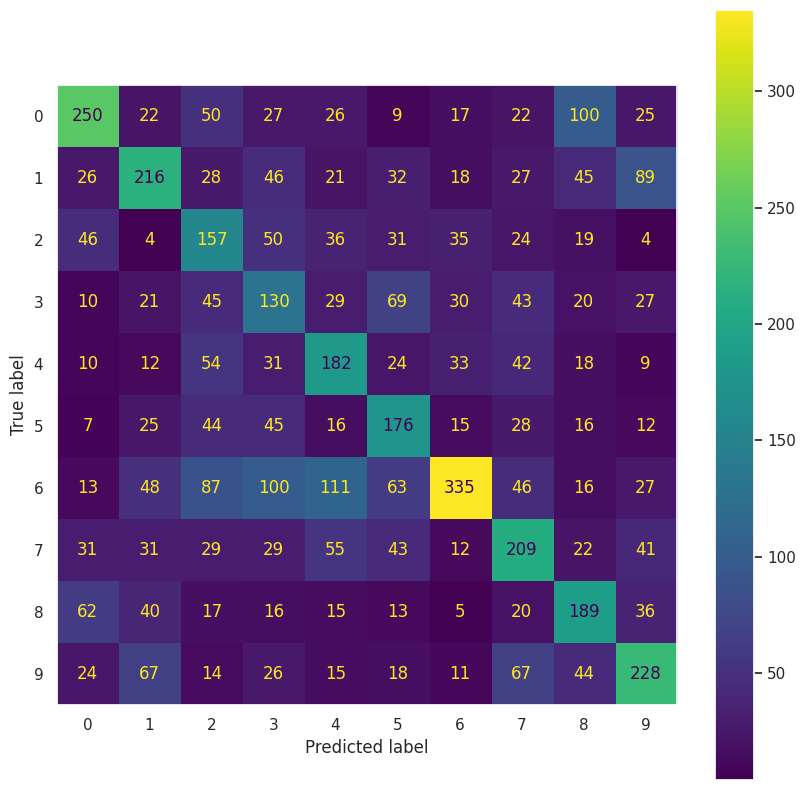

In [16]:
# Seperating loss and accuracy into individual variables
train_loss_m2, train_acc_m2 = new_model.evaluate(val_img_gen_1,
                                               batch_size=batch_size)

# Predicting validation data for confusion matrix
predict_m2 = np.argmax(new_model.predict(val_img_gen_1,
                                       verbose=0), axis=1)

# Creating confusion matrix
cm_m2 = confusion_matrix(predict_m2, y_val)

# Printing loss and accuracy
print('Loss on validation set:', train_loss_m2
      ,'\nAccuracy on validation set:', train_acc_m2, '\n')

sns.set(rc={'figure.figsize':(10,10)})
# Plotting confusion matrix
disp_2 = ConfusionMatrixDisplay(confusion_matrix=cm_m2)
disp_2.plot()
plt.grid(False)
plt.show()

The model we created performed much better than the imported model. It had a higher accuracy on the validation set, an a

### Predictions

In [17]:
def predict(img_path, img):

  image = tf.keras.utils.load_img(img_path, target_size=(32,32))

  plt.imshow(image)
  plt.axis('off')
  plt.show()

  img = cv2.resize(img,(32,32))
  img = np.reshape(img,[1,32,32,3])
  guess = np.argmax(model_1.predict(img, verbose =0))

  match guess:
    case 0:
      print('I think it is a Airplane')
    case 1:
      print('I think it is a Automobile')
    case 2:
      print('I think it is a Bird')
    case 3:
      print('I think it is a Cat')
    case 4:
      print('I think it is a Deer')
    case 5:
      print('I think it is a Dog')
    case 6:
      print('I think it is a Frog')
    case 7:
      print('I think it is a Horse')
    case 8:
      print('I think it is a Ship')
    case 9:
      print('I think it is a Truck')


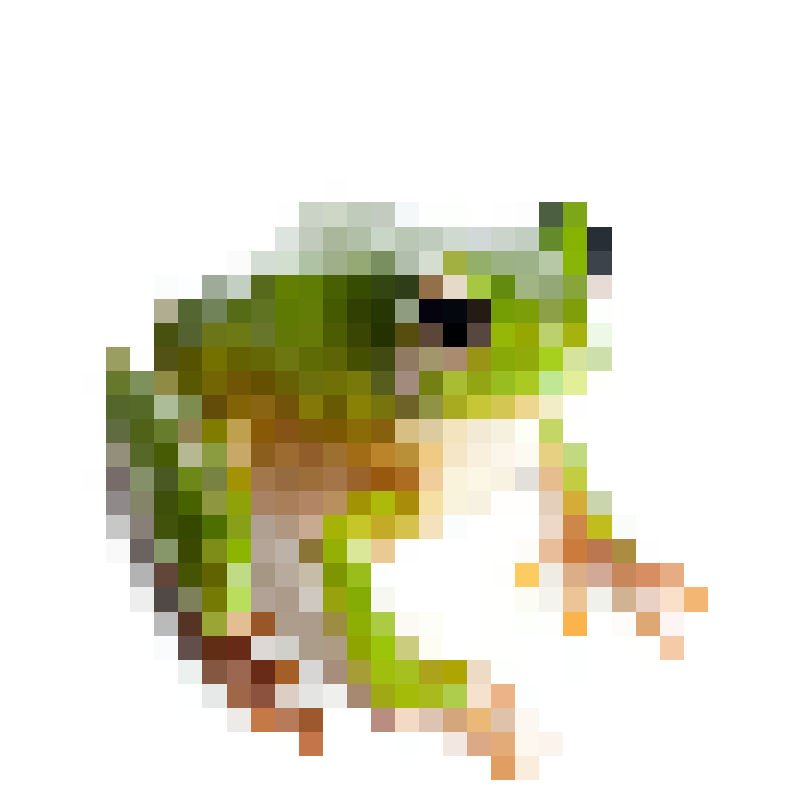

I think it is a Airplane


In [18]:
img_path = r'/content/frog.png'
img = cv2.imread('/content/frog.png')

predict(img_path, img)

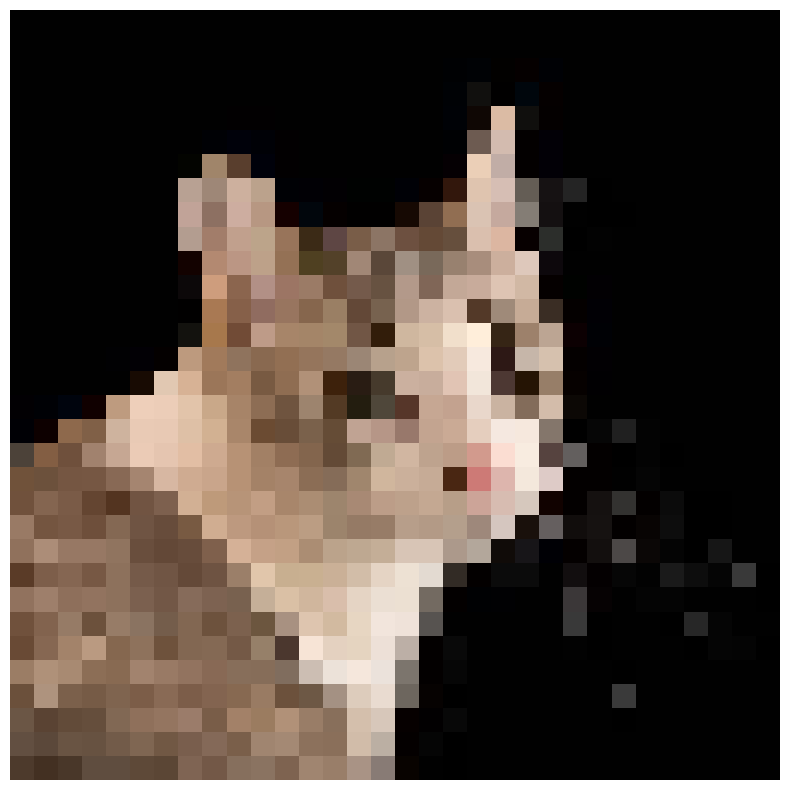

I think it is a Dog


In [19]:
img_path = r'/content/download.jpg'
img = cv2.imread('/content/download.jpg')

predict(img_path, img)

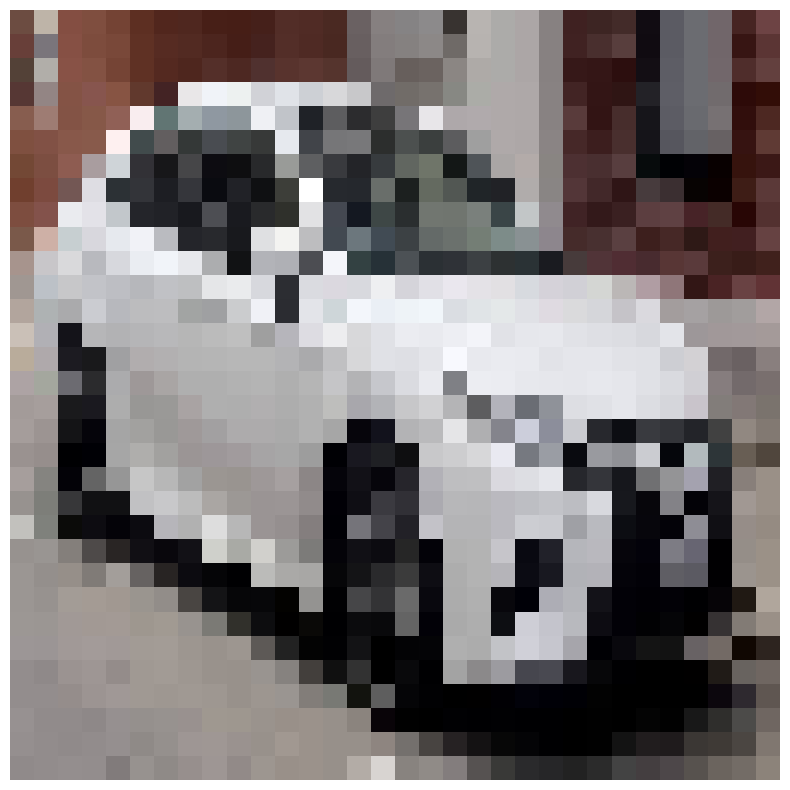

I think it is a Automobile


In [20]:
img_path = r"/content/images.jpg"
img = cv2.imread("/content/images.jpg")

predict(img_path, img)

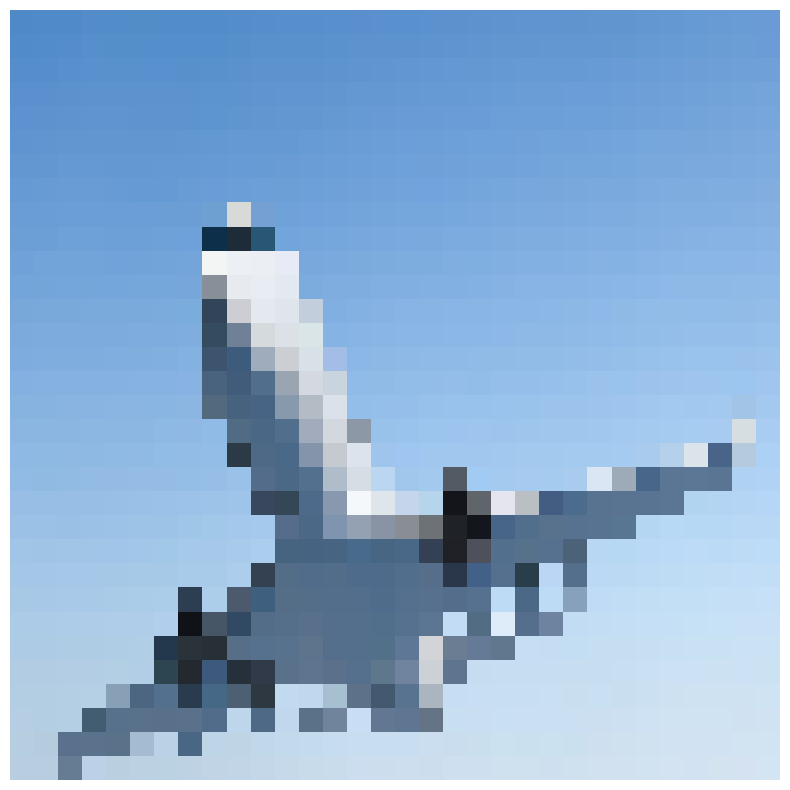

I think it is a Airplane


In [21]:
img_path = r'/content/airplane.png'
img = cv2.imread('/content/airplane.png')

predict(img_path, img)

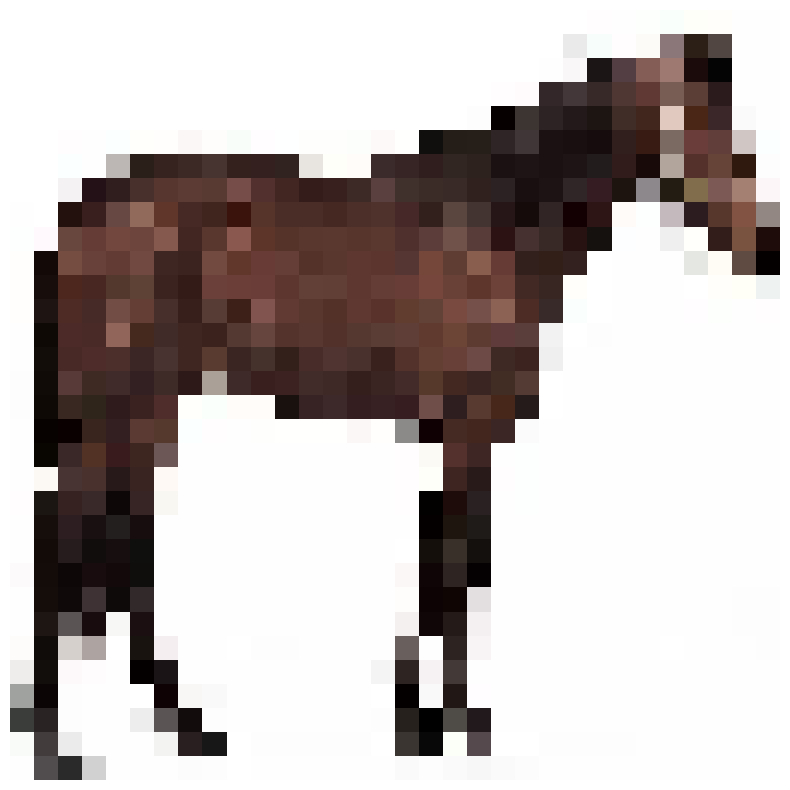

I think it is a Horse


In [22]:
img_path = r'/content/horse.jpg'
img = cv2.imread('/content/horse.jpg')

predict(img_path, img)

The model works fairly well, it guessed 3/5 of these images correctly. The frog was confused for an airplane. The cat was confused for a dog which was pretty funny
